In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")

In [27]:
data = np.load("../simplified_simulation_files/e0gpc_7.0_0000_particles_sl.npy", 
               allow_pickle=True)[()]['True detector hits']['Plane 0']

In [28]:
# Setup as of beginning of September 2021
CHIPS_SIZE_X = 0.02994176
CHIPS_SIZE_Y = 0.01376256

X_MID_POSITION_CHIPS_LIST = [0.06773, 0.09783, 0.12793, 0.15803, 0.18813, 0.21823, 0.24833, 0.27843, 0.30853,
                             0.29853, 0.32863, 0.35873, 0.38883, 0.41893, 0.44903, 0.47913, 0.50923, 0.53933]

Z_POSITIONS = [3.9620125, 3.9500125, 4.0620125, 4.0500125, 4.1620125, 4.1500125, 4.2620125, 4.2500125]

PIXEL_X = 1024
PIXEL_Y = 512

# Simplified setup
CHIPS_SIZE_X_SIMPLE = 18 * CHIPS_SIZE_X
CHIPS_SIZE_Y_SIMPLE = CHIPS_SIZE_Y

Z_POSITIONS_SIMPLE = [(Z_POSITIONS[0] + Z_POSITIONS[1]) / 2,
                      (Z_POSITIONS[2] + Z_POSITIONS[3]) / 2,
                      (Z_POSITIONS[4] + Z_POSITIONS[5]) / 2,
                      (Z_POSITIONS[6] + Z_POSITIONS[7]) / 2]

PIXEL_X_SIMPLE = 18 * PIXEL_X
PIXEL_Y_SIMPLE = PIXEL_Y

X_START_POSITION_SIMPLE = X_MID_POSITION_CHIPS_LIST[0] - 0.5 * CHIPS_SIZE_X
X_END_POSITION_SIMPLE = X_MID_POSITION_CHIPS_LIST[-1] + 0.5 * CHIPS_SIZE_X

Y_START_POSITION_SIMPLE = - 0.5 * CHIPS_SIZE_Y_SIMPLE
Y_END_POSITION_SIMPLE = 0.5 * CHIPS_SIZE_Y_SIMPLE

In [29]:
# hit density
num_pixels = 2**6
dx_pixel = CHIPS_SIZE_X / PIXEL_X
dy_pixel = CHIPS_SIZE_Y / PIXEL_Y

In [30]:
x_min = X_START_POSITION_SIMPLE 
y_min = Y_START_POSITION_SIMPLE

x_max = X_END_POSITION_SIMPLE
y_max = Y_END_POSITION_SIMPLE

range_x = (x_max - x_min) 
steps_x = range_x / (num_pixels * dx_pixel)

range_y = (y_max - y_min) 
steps_y = range_y / (num_pixels* dy_pixel)

stepsize_x = num_pixels * dx_pixel
stepsize_y = num_pixels * dy_pixel

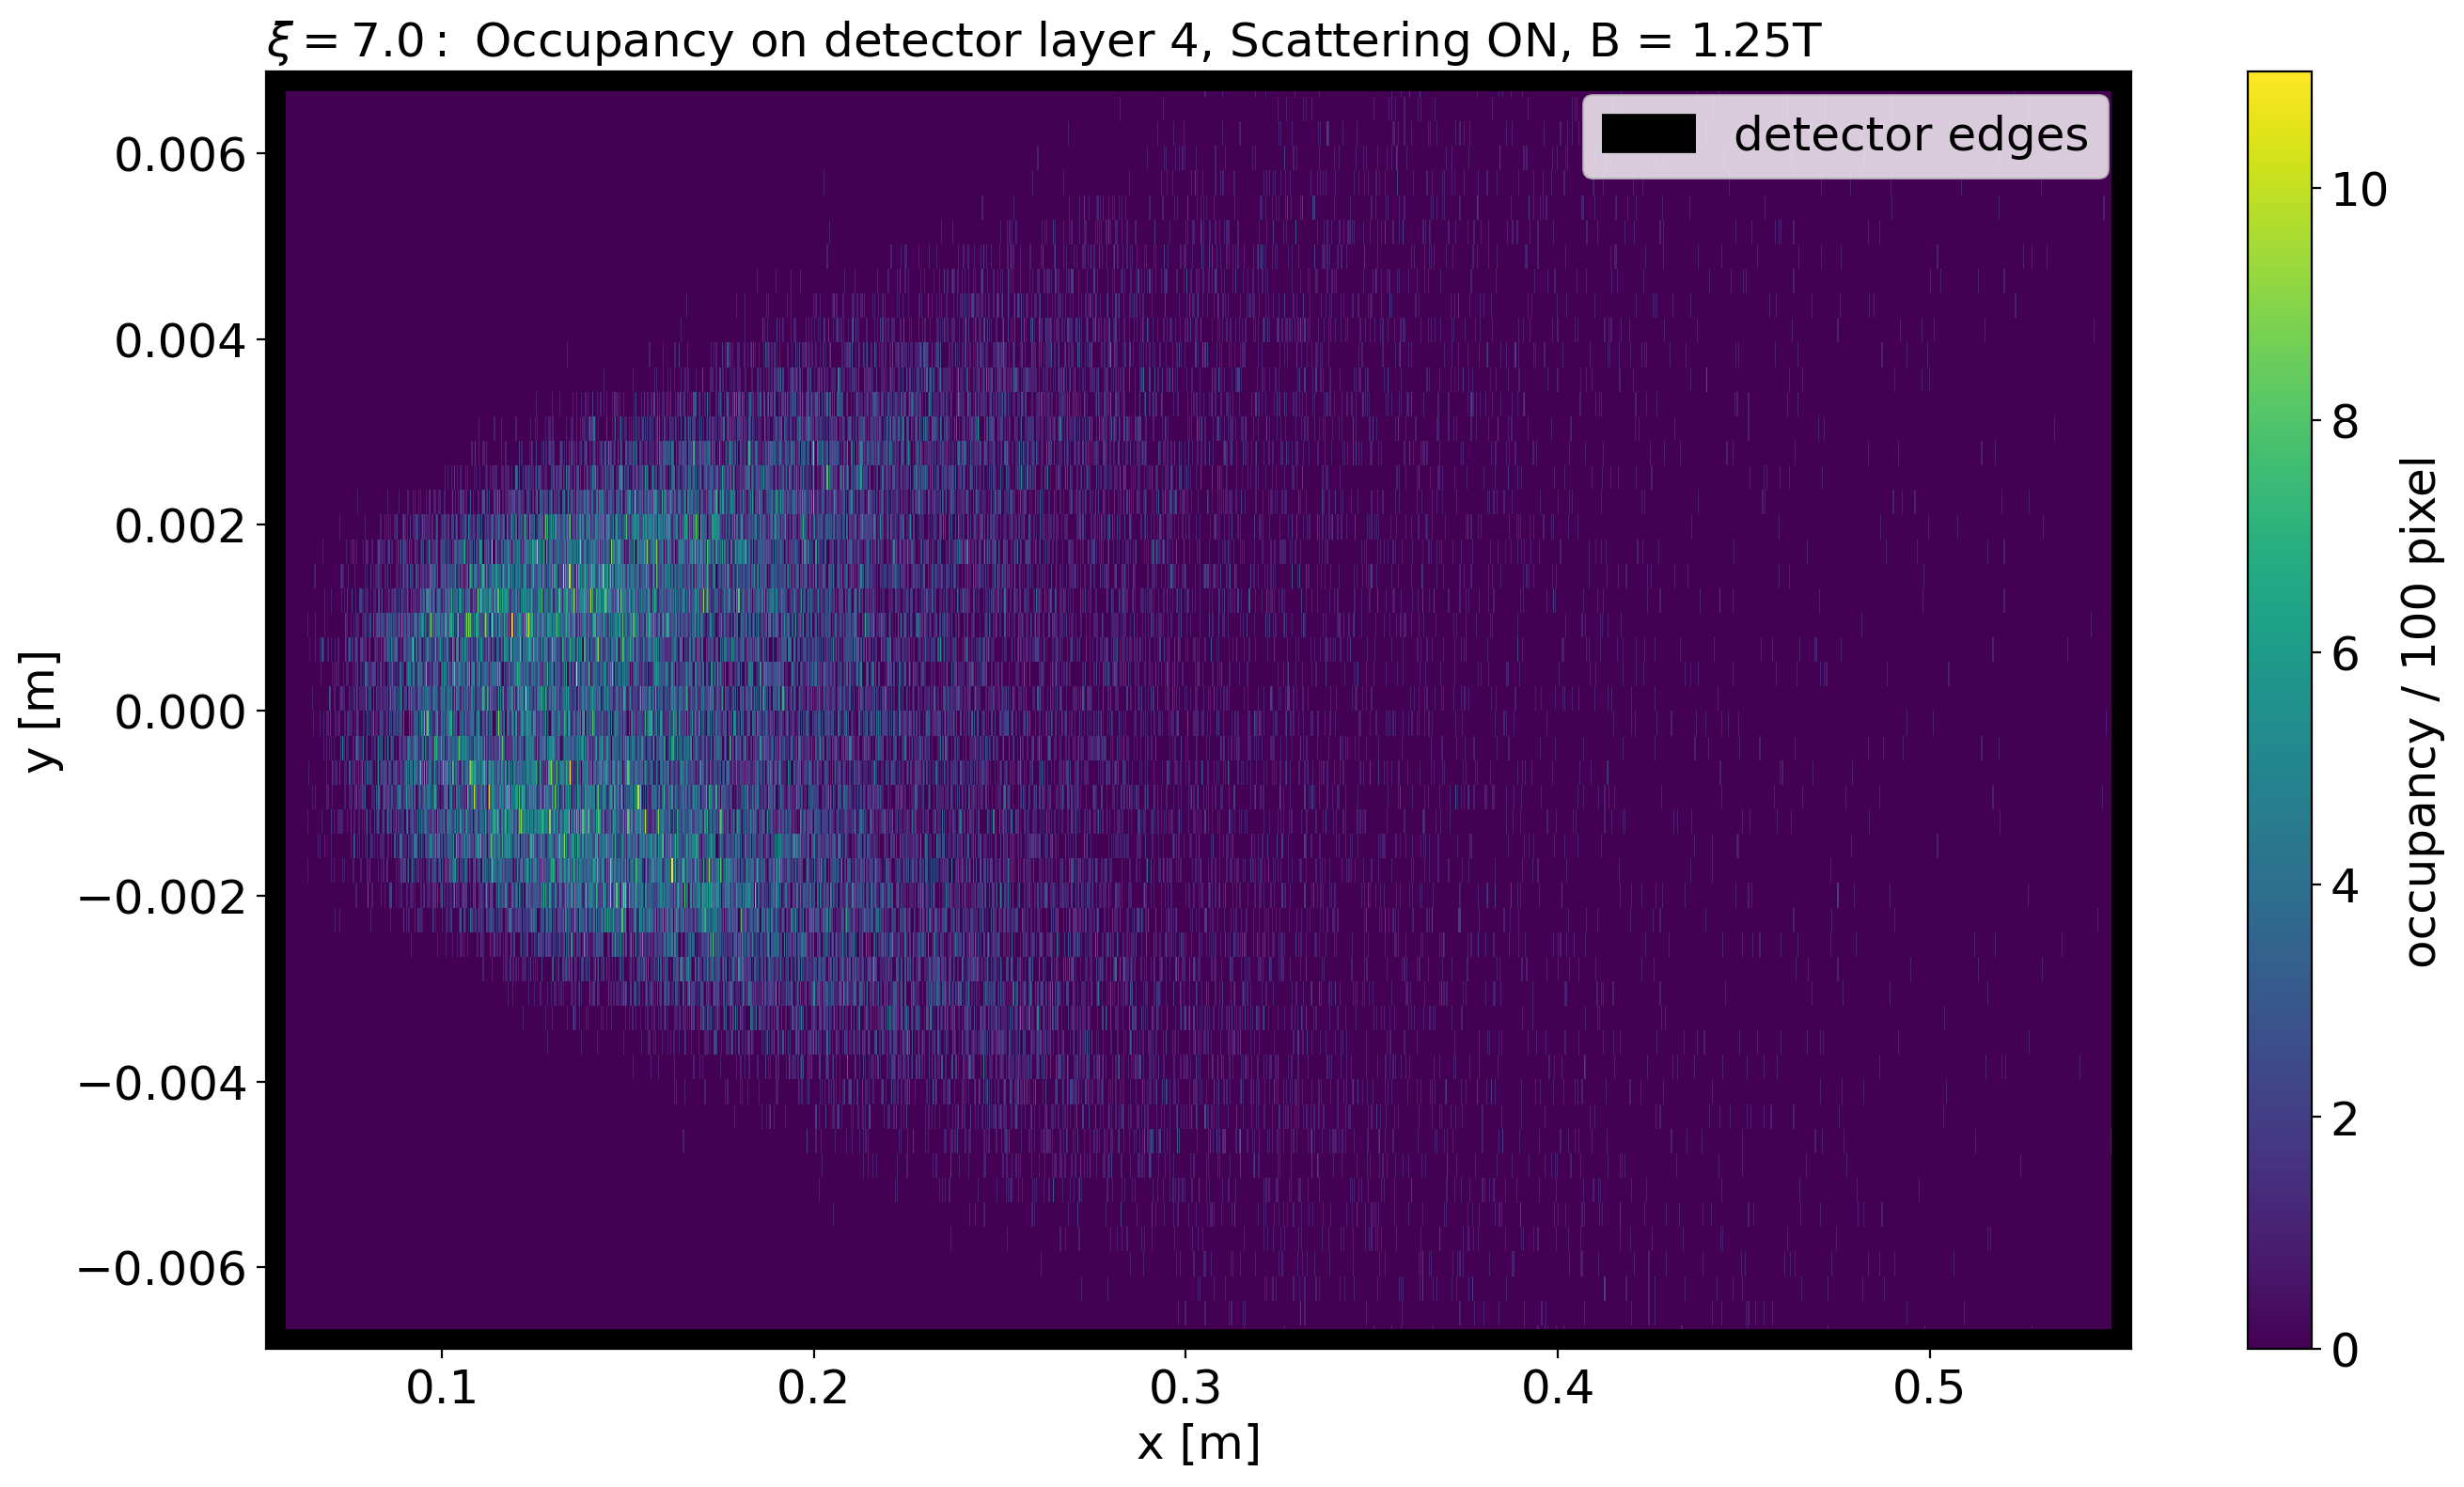

In [31]:
from matplotlib.patches import Rectangle

x = [value[0] for value in data.values() if X_START_POSITION_SIMPLE < value[0] < X_END_POSITION_SIMPLE and
                              Y_START_POSITION_SIMPLE < value[1] < Y_END_POSITION_SIMPLE]

y = [value[1] for value in data.values() if X_START_POSITION_SIMPLE < value[0] < X_END_POSITION_SIMPLE and
                              Y_START_POSITION_SIMPLE < value[1] < Y_END_POSITION_SIMPLE]

plt.figure(figsize= (16,9), dpi=200)
plt.hist2d(x, y, bins=(1816, 52), range=[[x_min, x_max], [y_min, y_max]]) # derived from the hit density values, 10x10pixels

# plt.vlines(max([value[0] for value in data_out[3].values()]), 
#            y_min, 
#            y_max,color="red", 
#            linestyle="dashed", label="upper limit selection in x")
plt.plot([x_min, x_max], [y_min, y_min], "k", linewidth=15)
plt.vlines(x_min, y_min, y_max, "k", linewidth=15)
plt.plot([x_min, x_max], [y_max, y_max], "k", linewidth=15)
plt.vlines(x_max, y_min, y_max, "k", linewidth=15, label="detector edges")
plt.xlabel("x [m]", fontsize=18)
plt.ylabel("y [m]", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.legend(loc="best", fontsize=18)
cbar = plt.colorbar()
cbar.set_label("occupancy / 100 pixel", size=18)
cbar.ax.tick_params(labelsize=18) 
plt.title(r"$\xi = 7.0: $ " + "Occupancy on detector layer 4, Scattering ON, B = 0.95T", fontsize=18, loc="left")


plt.savefig("track_density_7.0.pdf")
plt.savefig("track_density_7.0.jpg")

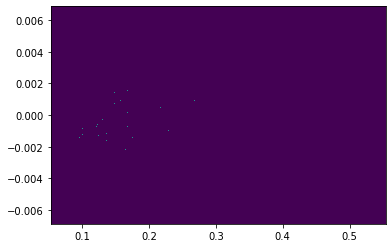

In [21]:
test = plt.hist2d(x, y, bins=(17160, 520), range=[[x_min, x_max], [y_min, y_max]])

In [ ]:
test[0]

In [ ]:
512/52 * 18*1024/1816